# Criação do Modelo

Importando bibliotecas necessárias

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Configurando o estilo do Seaborn

In [2]:
sns.set(style="whitegrid")

Carregando e visualizando o dataset

In [3]:
data_path = '/content/powerconsumption_gs.csv'
data = pd.read_csv(data_path, sep=',')
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.set_index('Datetime', inplace=True)
data.drop(columns=['Date', 'Time'], inplace=True)
print(data.head())
print(data.info())

<ipython-input-3-9de162c51514>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


                    Global_active_power Global_reactive_power Voltage  \
Datetime                                                                
2006-12-16 17:24:00               4.216                 0.418  234.84   
2006-12-16 17:25:00                5.36                 0.436  233.63   
2006-12-16 17:26:00               5.374                 0.498  233.29   
2006-12-16 17:27:00               5.388                 0.502  233.74   
2006-12-16 17:28:00               3.666                 0.528  235.68   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
Datetime                                                             
2006-12-16 17:24:00             18.4              0              1   
2006-12-16 17:25:00               23              0              1   
2006-12-16 17:26:00               23              0              2   
2006-12-16 17:27:00               23              0              1   
2006-12-16 17:28:00             15.8              0              1  

Tratamento de dados

In [4]:
# Convertendo colunas usadas em análises para o tipo numérico
cols_to_convert = [
'Global_active_power',
'Global_reactive_power',
'Voltage',
'Global_intensity',
'Sub_metering_1',
'Sub_metering_2',
'Sub_metering_3'
]

for col in cols_to_convert:
  data[col] = pd.to_numeric(data[col], errors='coerce')

data.fillna(data.mean(), inplace=True) # Preenchendo NaN/dados faltantes com média

Verificação de dados faltantes

In [5]:
print(data.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


Análise Estatística Descritiva e Visualização

       Global_active_power  Global_reactive_power       Voltage  \
count         1.048575e+06           1.048575e+06  1.048575e+06   
mean          1.108202e+00           1.182732e-01  2.399598e+02   
std           1.127352e+00           1.092935e-01  3.278125e+00   
min           7.600000e-02           0.000000e+00  2.234900e+02   
25%           2.880000e-01           0.000000e+00  2.379800e+02   
50%           5.560000e-01           9.800000e-02  2.402000e+02   
75%           1.542000e+00           1.860000e-01  2.421400e+02   
max           1.067000e+01           1.390000e+00  2.521400e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      1.048575e+06    1.048575e+06    1.048575e+06    1.048575e+06  
mean       4.718123e+00    1.177451e+00    1.475177e+00    5.933837e+00  
std        4.754337e+00    6.308907e+00    6.340366e+00    8.194452e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.200000e+00   

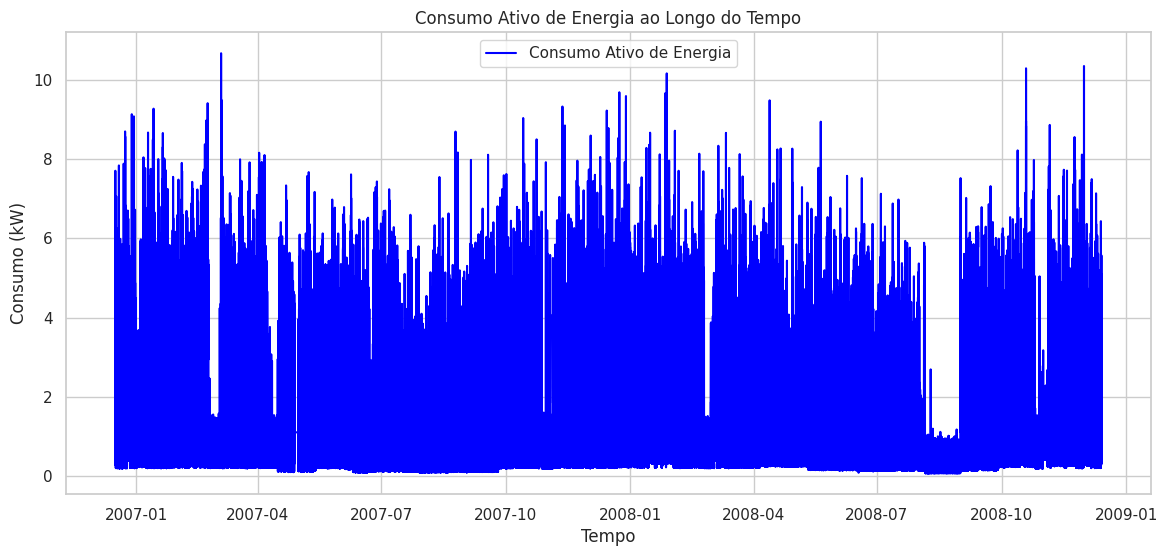

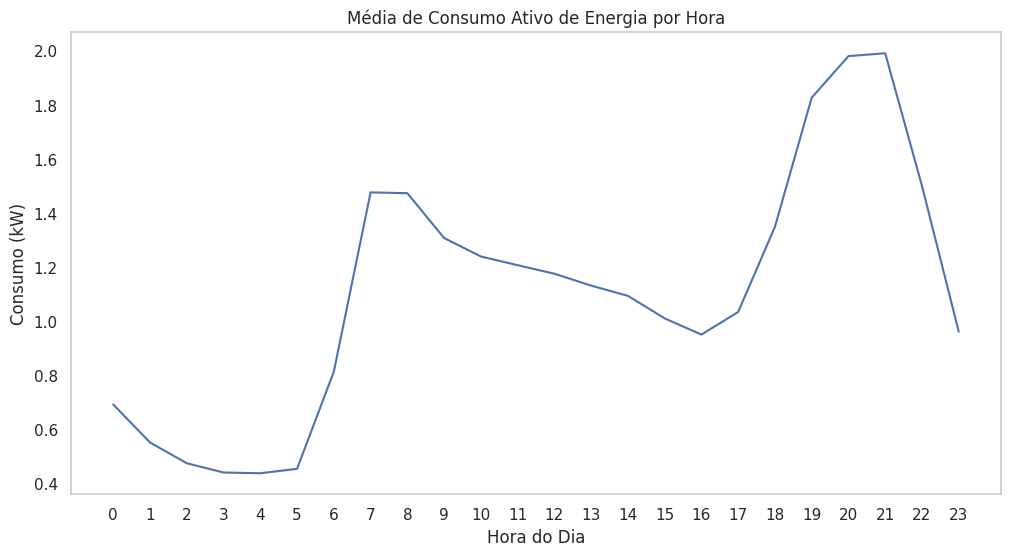

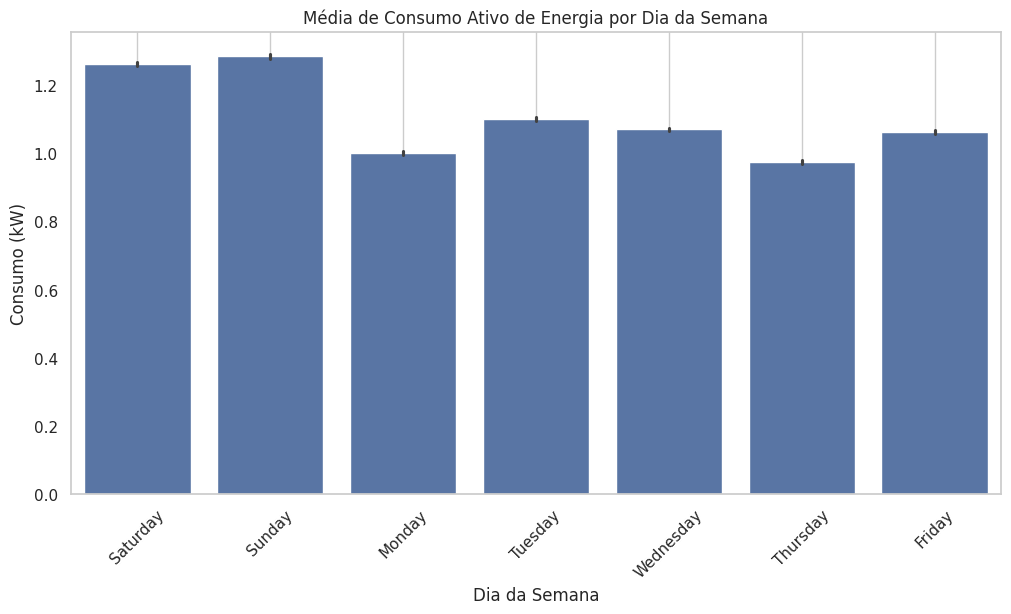

In [6]:
print(data.describe())
# Analisando o consumo de energia ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(data['Global_active_power'], label='Consumo Ativo de Energia', color='blue')
plt.title('Consumo Ativo de Energia ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Consumo (kW)')
plt.legend()
plt.show()
# Extraindo informações de hora e dia da semana
data['Hour'] = data.index.hour
data['DayOfWeek'] = data.index.day_name()

# Média de consumo por hora
plt.figure(figsize=(12, 6))
sns.lineplot(data=data.groupby('Hour')['Global_active_power'].mean())
plt.title("Média de Consumo Ativo de Energia por Hora")
plt.xlabel("Hora do Dia")
plt.ylabel("Consumo (kW)")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Média de consumo por dia da semana
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Global_active_power', data=data, estimator=np.mean)
plt.title("Média de Consumo Ativo de Energia por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Consumo (kW)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Criando nova variável de classificação

In [7]:
# Classificando em 3 categorias - Consumo alto, médio e baixo
data['Consumption_Category'] = pd.qcut(data['Global_active_power'], q=3, labels=False)

Preparando, escalonando os dados para Machine Learning e divisão dos conjuntos de treino e teste

In [8]:
print(data.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Hour                     0
DayOfWeek                0
Consumption_Category     0
dtype: int64


In [9]:
X = data.drop(columns=['Global_active_power', 'Consumption_Category', 'DayOfWeek'])
y = data['Consumption_Category']

# Divisão dos conjuntos de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tratamento de valores não numéricos
X_train.replace('?', np.nan, inplace=True)
X_test.replace('?', np.nan, inplace=True)

# Preenchendo valores NaN
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
print(X_train.dtypes) # Verificando tipo de dados

# Escalonamento dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.fillna(X_train.mean()))
X_test_scaled = scaler.transform(X_test.fillna(X_test.mean()))

Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Hour                       int32
dtype: object


Modelagem utilizando RandomForestClassifier

In [10]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Avaliação do Modelo

In [11]:
y_pred = rf.predict(X_test_scaled)
# Matriz de Confusão
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
# Report de Classificação
print(classification_report(y_test, y_pred))

Matriz de Confusão:
 [[68576  2164     0]
 [ 2570 65427   855]
 [    0   696 69427]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     70740
           1       0.96      0.95      0.95     68852
           2       0.99      0.99      0.99     70123

    accuracy                           0.97    209715
   macro avg       0.97      0.97      0.97    209715
weighted avg       0.97      0.97      0.97    209715



IsolationForest para identificar casos de consumo de energia

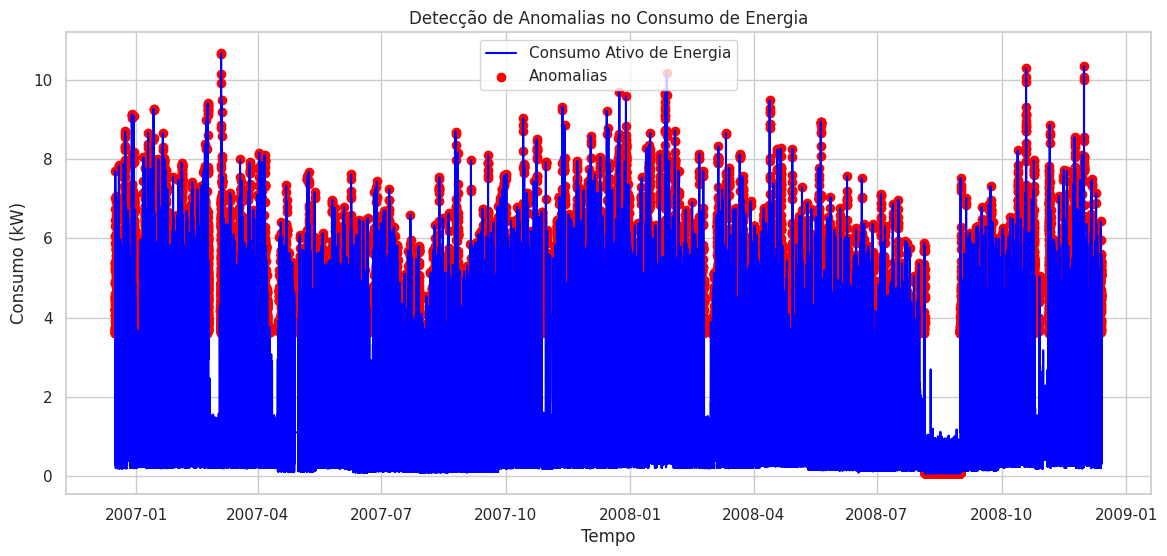

In [12]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly'] = iso_forest.fit_predict(data[['Global_active_power']])
plt.figure(figsize=(14, 6))
plt.plot(data['Global_active_power'], label='Consumo Ativo de Energia', color='blue')
plt.scatter(data[data['Anomaly'] == -1].index, data[data['Anomaly'] == -1]['Global_active_power'], color='red', label='Anomalias')
plt.title('Detecção de Anomalias no Consumo de Energia')
plt.xlabel('Tempo')
plt.ylabel('Consumo (kW)')
plt.legend()
plt.show()

Modelagem utilizando Logistic Regression

In [13]:
log_reg = LogisticRegression(max_iter=1000, random_state=42) # max_iter pode ser ajustado conforme necessário
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Fazendo previsões no conjunto de Teste

In [14]:
y_pred_log_reg = log_reg.predict(X_test_scaled)

Avaliando o desempenho do modelo

In [15]:
print("Matriz de Confusão (Regressão Logística):\n", confusion_matrix(y_test, y_pred_log_reg))
print("Report de Classificação (Regressão Logística):\n", classification_report(y_test, y_pred_log_reg))

Matriz de Confusão (Regressão Logística):
 [[68528  2212     0]
 [ 4447 63453   952]
 [    0  1310 68813]]
Report de Classificação (Regressão Logística):
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     70740
           1       0.95      0.92      0.93     68852
           2       0.99      0.98      0.98     70123

    accuracy                           0.96    209715
   macro avg       0.96      0.96      0.96    209715
weighted avg       0.96      0.96      0.96    209715



Gráfico de Dispersão com Logistic Regression

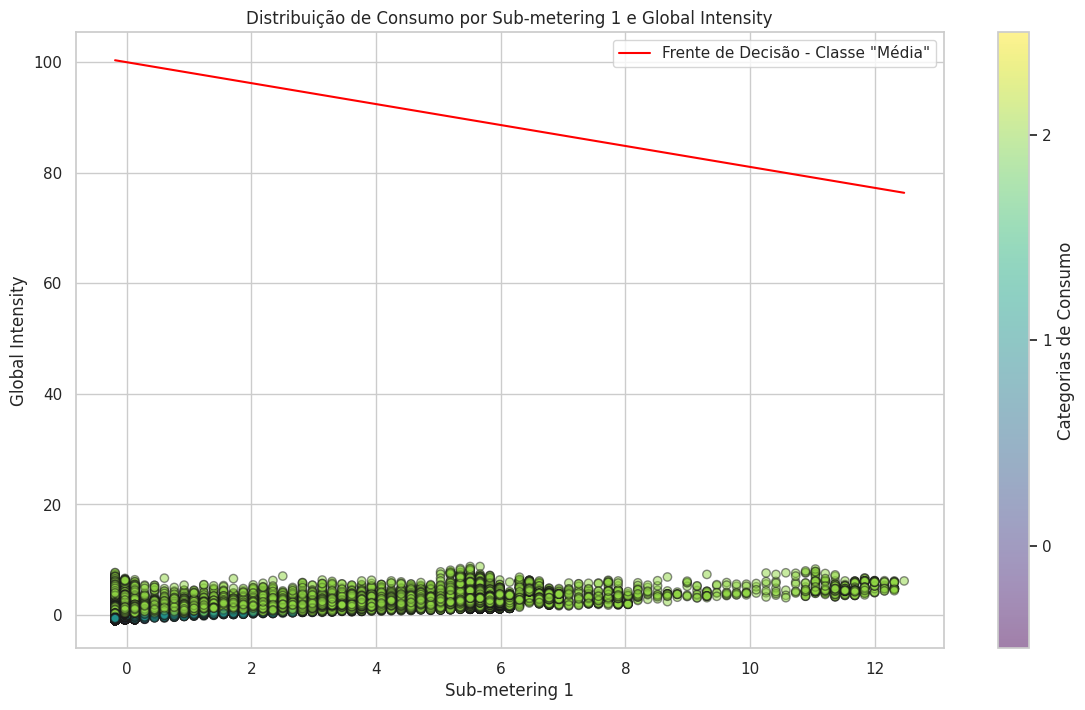

In [22]:
# Usando as colunas que foram utilizadas para ajustar o modelo e o scaler
columns_used_for_scaling = [
'Global_reactive_power',
'Voltage',
'Global_intensity',
'Sub_metering_1',
'Sub_metering_2',
'Sub_metering_3',
'Hour'
]

# Criando um DataFrame apenas com as colunas relevantes e na ordem correta
X_plot = data[columns_used_for_scaling]

# Escalonando todas as características novamente
X_plot_scaled = scaler.transform(X_plot.fillna(X_plot.mean()))

# Fazendo a previsão das probabilidades
y_proba = log_reg.predict_proba(X_plot_scaled)

# Criando um DataFrame para facilitar a plotagem
plot_data = pd.DataFrame(X_plot_scaled, columns=columns_used_for_scaling)
plot_data['Consumption_Category'] = data['Consumption_Category'].values

# Agora que temos os dados escalonados corretamente, podemos plotar
plt.figure(figsize=(14, 8))
scatter = plt.scatter(plot_data['Sub_metering_1'], plot_data['Global_intensity'],
c=plot_data['Consumption_Category'], cmap='viridis', alpha=0.5, edgecolors='k')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Categorias de Consumo')
plt.clim(-0.5, 2.5) # Ajustando a escala de cores
plt.title("Distribuição de Consumo por Sub-metering 1 e Global Intensity")
plt.xlabel("Sub-metering 1")
plt.ylabel("Global Intensity")

# Adicionando a linha de decisão para a classe 1 ("Médio")
x_values = np.linspace(plot_data['Sub_metering_1'].min(), plot_data['Sub_metering_1'].max(), 100)
y_values = -(log_reg.intercept_[1] + log_reg.coef_[1][0] * x_values) / log_reg.coef_[1][1] # Para a classe 1

# Adicionando a linha de decisão ao gráfico
plt.plot(x_values, y_values, label='Frente de Decisão - Classe "Média"', color='red')

plt.legend()
plt.show()